In [1]:
#Versão do python que trabalharemos
from platform import python_version

print(python_version())

3.11.5


In [2]:
#Usaremos nesse trampo de machine learning algumas bibliotecas

import sklearn as sl #Scikit-learn é uma biblioteca em Python para aprendizado de máquina
import pandas as pd #ferramentas para manipulação e análise de dados tabulares
import numpy as np #funções matemáticas para operações eficientes em grandes conjuntos de dados numéricos.
import matplotlib.pyplot as plt #permite a criação de gráficos estáticos, interativos e animações

In [3]:
# Carregando arquivo csv usando Pandas
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = pd.read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


In [4]:
## Análise Exploratória de Dados

In [5]:
dados.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Tipo de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [7]:
# Sumário estatístico
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

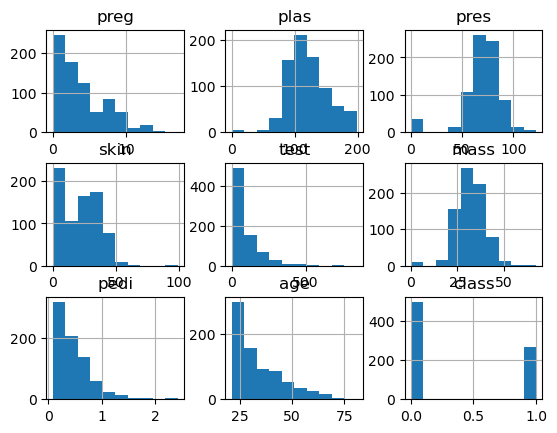

In [9]:
# Histograma Univariado
dados.hist()
plt.show()

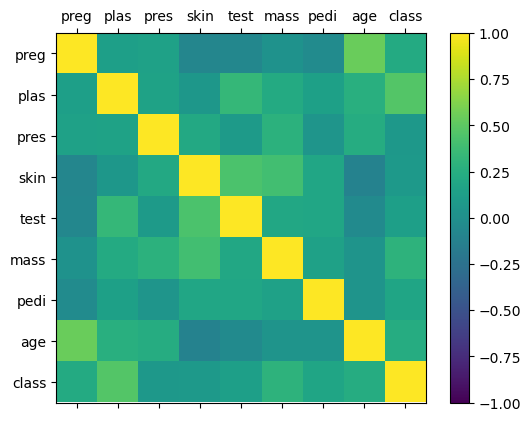

In [10]:
# Matriz de Correlação com nomes das variáveis
correlations = dados.corr()

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Transformando os dados para a mesma escala (entre 0 e 1)

array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]



In [13]:
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print(rescaledX[0:5,:])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [14]:
# Feature Extraction

# Import dos módulos
from sklearn.decomposition import PCA

# Seleção de atributos
pca = PCA(n_components = 3)
fit = pca.fit(X)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, 
                                                        test_size = teste_size, 
                                                        random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Score
result = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))



Acurácia: 78.740%


In [18]:
#A regressão linear é um modelo simples e fácil de entender. 
#A relação entre as variáveis independentes e dependentes é representada por uma equação linear, 
#o que torna a interpretação dos resultados relativamente direta.

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print(resultado)
print(resultado.mean())



[0.81818182 0.75324675 0.75324675 0.79220779 0.79220779 0.77922078
 0.68831169 0.84415584 0.82894737 0.72368421]
0.777341079972659


LR: 0.777341 (0.046051)
LDA: 0.766969 (0.047966)
NB: 0.759142 (0.038960)
KNN: 0.710988 (0.050792)
CART: 0.690243 (0.040093)
SVM: 0.760458 (0.034712)


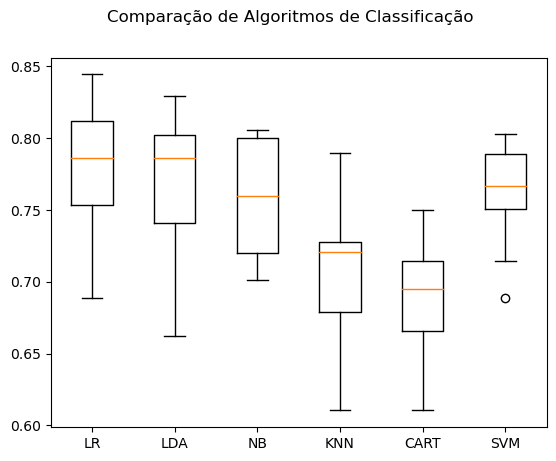

In [20]:
# Import dos módulos
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Separando o array em componentes de input e output
array = dados.values
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Preparando os modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(modelo, X, Y, cv=kfold, scoring='accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()



In [26]:
#Agora vamos otimiziar nosso modelo para termos o maximo de precisão
#O AdaBoost atribui pesos às instâncias no dataset,
#definindo quão fácil ou difícil elas são para o processo de classificação, permitindo que o 
#algoritmo tenha mais ou menos atenção às instâncias durante o processo de construção dos modelos.

# Import dos módulos
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Definindo o número de trees
num_trees = 30

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Criando o modelo
modelo = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
resultado = cross_val_score(modelo, X, Y, cv=kfold)

# Print do resultado
print(resultado.mean())

0.7552802460697198
